<a href="https://colab.research.google.com/github/AshutoshKumarDubey/Regression_Capstone_Project_Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_By_Ashutosh_Kumar_Dubey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand Prediction





> Project Type- Regression

> Contribution- Individual (Ashutosh Kumar Dubey)










#Problem Statement
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 

# Project Summary

**Introduction**

The information was sourced from Seoul, which is a city. A bike-sharing system is a service that makes bikes available to people for short-term, shared use that can be paid for or provided for free. Many bike share programmers enable users to pick up a bike from a "dock," which is typically computer-controlled and where they enter their payment details to have the bike unlocked. Then, you can return this bike to a different system-affiliated dock. 

Date, hour, temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, seasons, holiday, working day, and the number of rental bikes were among the factors in the data.
The goal was to create a machine learning model that, given other data, could forecast the number of leased bikes needed for an hour. 



**Methodology and conclusion**

First, data summary was seen ,then, data was cleaned and its features were amended or dropped so that Exploratory data analysis could be done. During EDA, we attempted to glean insights from the available data. With the help of barplot and pointplots we were able to pinpoint certain patterns,relations as well as identify the characteristics that may have had an influence on our dependent variable. Numerical features were analysed using distplots and boxplots. Target feature was normalized, correlation calculated and multicollineaity handled. After that, Regression plots were made, the, One hot encoding was done which led to creation of new features The categorical variables were also encoded. Trin-test split was done on the encoded data, after that several algorithms were applied including Linear Regression, Lasso Regression, Ridge Regression, Random Forest Regressor to produce models. The best of these was Random Forest with R-squared value of 0.98 on training set and 0.89 on test set. Feature importance was also calculated for the Random Forest model , most important features which had a major impact on the model predictions were; temperature, wind-speed and solar-radiation. 

**Business implications of insights**

Firstly, since time trends are known for variables (season, holiday, functioning day, weekday as per hour of the day) we can use this information to grow our business. Using this information alongwith customer feedback we can design promotions, offers etc. to increase customer satisfaction and customer reach which can lead to positive growth of business. Secondly, we will be able to make better business decisions because we have got rid of the noise in data which could have impacted our choosing of best possible decision. Thirdly, the gained insights can help in positively growing the business of rented bikes and cutting on factors leading to negative growth. For example:- Advertisement campaigns targeted to increase Rented bike count in summers can incline the business to grow positively. Lastly, a rightly interpreted model can be used to make business decisions.

**Scope**

Because the data is time-dependent, values of temperature, wind speed, sun radiation, etc., would not always be constant. The model functioned well in this instance. As a result, there will be situations in which the model may not work well. We must be ready for all eventualities and periodically evaluate our model because machine learning is a field that is rapidly changing.


# Github Link
https://github.com/AshutoshKumarDubey/Regression_Capstone_Project_Bike-Sharing-Demand-Prediction.git

# Importing the Dataset and Loading

In [ ]:
#Importing all the required libraries that may be used in execution of the code to be written below:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


from datetime import datetime
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PolynomialFeatures 
import warnings
warnings.filterwarnings('ignore'
)


In [ ]:
#let's mount the google drive for import the dataset
from google.colab import drive
drive.mount('/content/drive'
)


Mounted at /content/drive


In [ ]:
#Importing the dataset.
df=pd.read_csv('/content/drive/MyDrive/Copy of SeoulBikeData.csv',encoding = 'Latin')

# UNDERSTANDING THE DATASET

In [ ]:
#Let us check the number of rows and columns in the dataset.
df.shape

(8760, 14)

In [ ]:
#Seeing the first 5 rows of dataset to get an idea of features and values.
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Seeing the last 5 rows to gauge the outline of dataset.
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Checking the data type of different columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Getting a summary of the data to see the range of values of different features.
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Here we have an observation from the above description that 'Rented Bike Count','Visiblity' are the ones where there is considerable difference between the mean and median and we can say that these might have a skewed distribution.Otherwise, almost all the other do not have muchdifference.


# DATA CLEANUP

In [ ]:
# A check for the null/missing values.
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We find that there are no null values in the dataset.

In [ ]:
# Check for the duplicate values.
duplicate=df.duplicated().sum()

We find that there are no duplicate values in the dataset.

Extracting the usable value from Date column. Now, since it is object dtype, we need to convert it to date dtype so that we can extract numerous information for this date column only.

In [ ]:
# Converting date column dtype object to date.
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# Informative features extracted from the date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_week'] = df['Date'].dt.day_name()

The column "day", it contains the details about the each day of the month, for our relevence we don't need data for each day of each month  but we need the data which tells us if a day is a weekday or a weekend so we convert it into this format and drop the "day"column.


In [ ]:
# Creating a new column of 'weekend_or_not' by applying 'ONE-HOT-ENCODING' to make it usable fo the model.
df['weekend_or_not'] = np.where(df['Day_of_week'].isin(['Sunday', 'Saturday']),1,0)

In [ ]:
# Dropping the columns like DATE, and YEAR for the above stated reasons
df=df.drop(columns=['Date','Day_of_week','Year'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [ ]:
# Since 'hour','month' and ' weekend_or_not ' must be regarded as Categorical data therefore the type need to be changed
df[['Hour','Month','weekend_or_not']]=df[['Hour','Month','weekend_or_not']].astype('category')

In [ ]:
# Dividing Data in categorical and numerical features for better analysis -
numeric_features= df.select_dtypes(include=['int64','float64'])
categorical_features=df.select_dtypes(include=['category','object'])

# EXPLORATORY DATA ANALYSIS

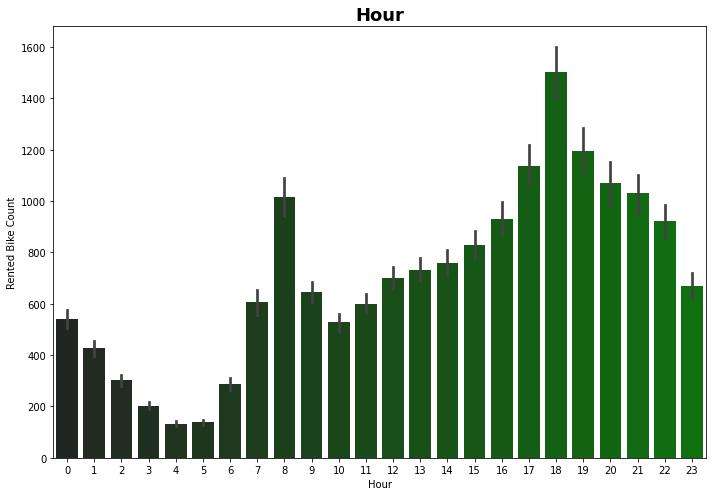

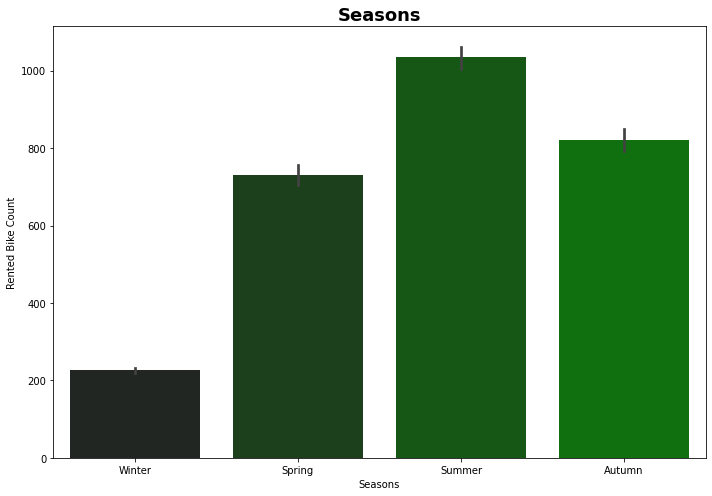

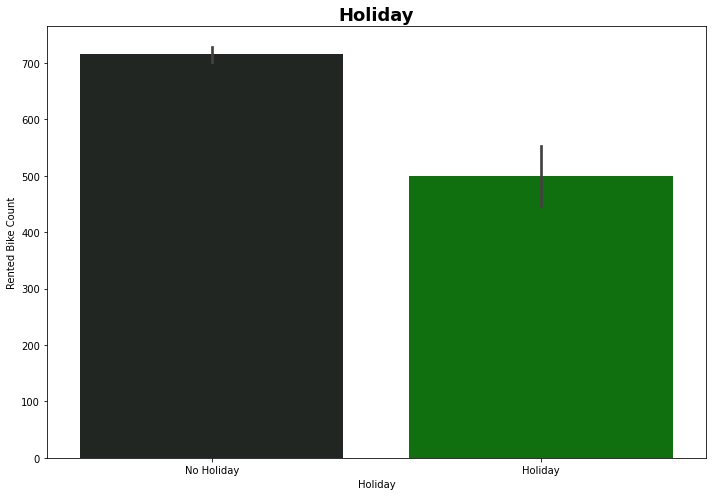

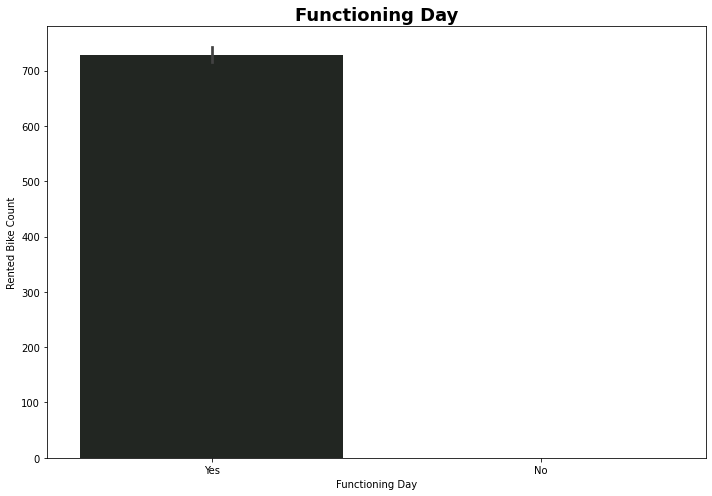

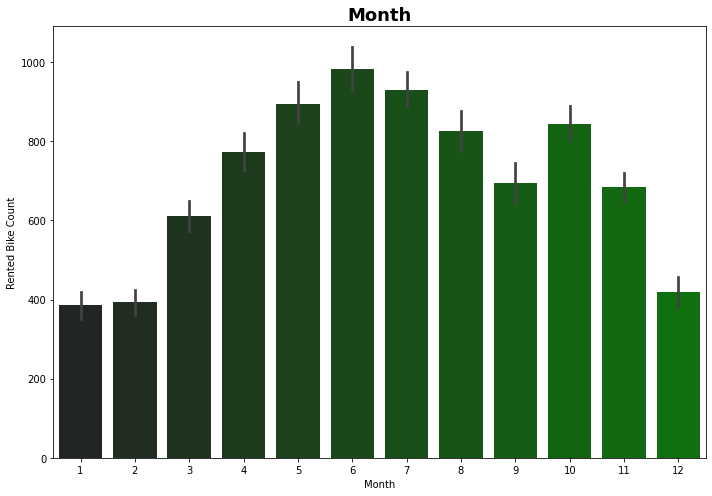

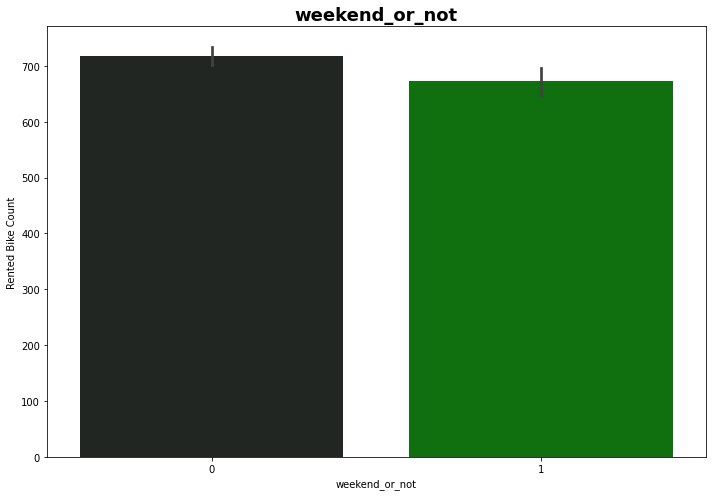

In [ ]:
# Creating bar plot for categorical columns value count -
for i in categorical_features.columns:
 plt.figure(figsize = (10,7))
 sns.barplot(df[i], df['Rented Bike Count'], palette = 'dark:Green').set_title( i, fontdict = { 'fontsize': 18},weight= 'bold')
 plt.tight_layout()

Why Bar Plot was chosen?

* Bar charts are to be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables.A bar diagram makes it easy to compare sets of data between different groups at a glance. They are preferred over other plots because they allow the reader to recognize patterns or trends far more easily than looking at a table of numerical data.

Inferences:
1. In the above plots first one shows the use of rented bike in accordance with the hours.
2. From the first plot only we can infer that -in general people used rented bikes during their commuting hours i.e from 7am to 9am in morning and 5pm to 7pm in the evening.
3. People rent bikes most in Summer followed by Autumn and Spring. Winter has a very low bike rent count, it has a value 20% of that in the Summer season.
4. Rented Bike count for Non-holiday is about 40% more than that on holidays.
5. Rented bike count increases from January to June where it peaks then it goes down till September, rises in October and again drops till December.
6. There is a slight about 10%-15% difference in Rented bike count values on Weekdays and Weekends with Weekdays having a higher value.
7. Only on a Functioning day, bikes are rented.

Business Implications:

The gained insights can help in positively growing the business of rented bikes and cutting on factors leading to negative growth. For example:- Advertisement campaigns targeted to increase Rented bike count in summers can incline the business to grow positively.

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekend ')]

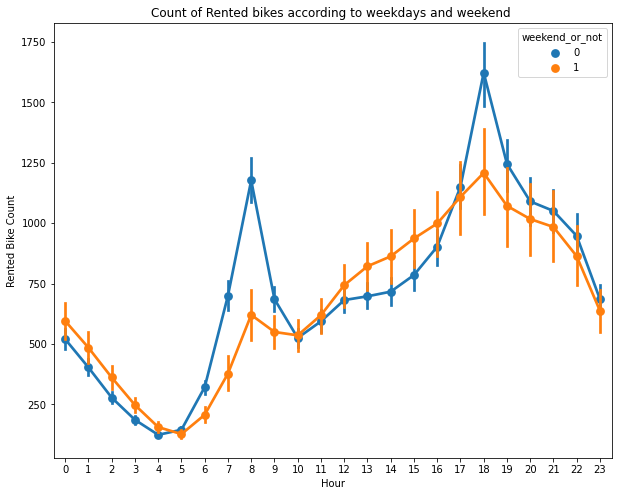

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='weekend_or_not',ax=ax)
ax.set(title='Count of Rented bikes according to weekdays and weekend ')

From the above plot we can see that in the weekdays demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.
Weekend demand follows similar time pattern but the peak values are lower by 50% at 8am and 30% at 7pm.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

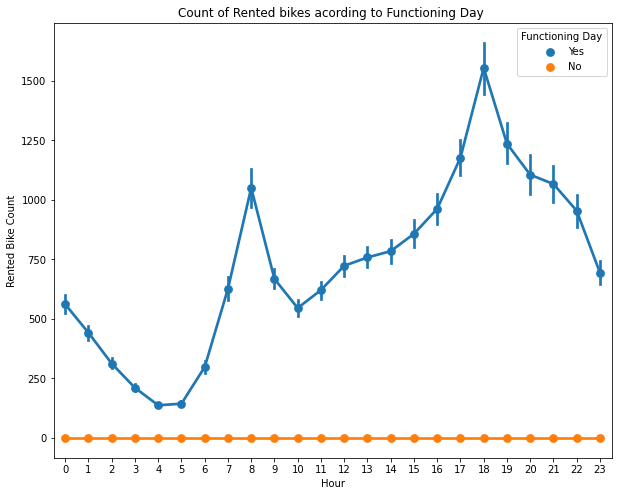

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')


Similar to the previous plot, the functioning day demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

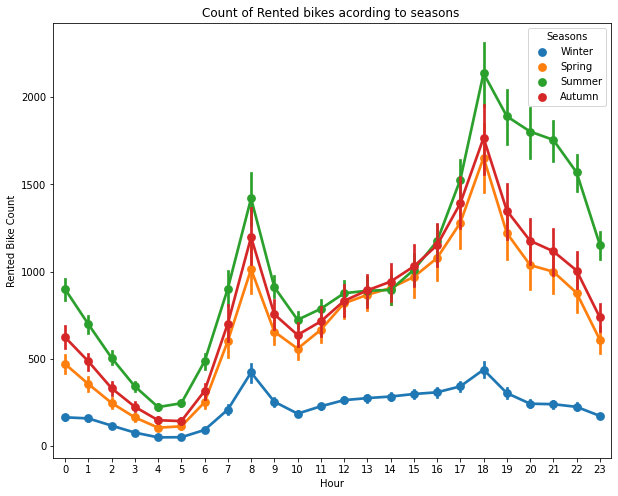

In [ ]:
#analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

Demand of the bike is extremely low for 12am to 5am and decreases consistently. Then it Starts rising from 5am and reaches local maxima at 8am after that it decreases from that point till 11am. After that it again starts risingand reaches peak value at 7pm. After that it decreases from there onwards.
Same time trend is followed for all four seasons. The peak values differ and is highest for Summer followed by Autumn and Spring. Winter has peak value of about 20% of peak value of Summer.

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

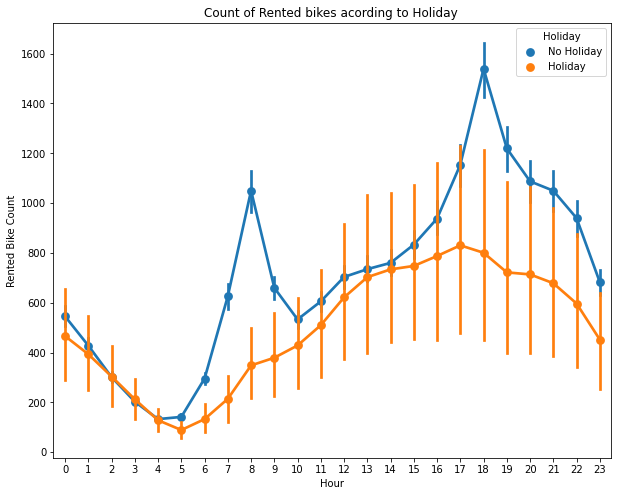

In [ ]:
#analysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')


Time trend for no holiday is same as previous three plots. Time trend for holiday is a bit different. Demand decreases from 12am to 5am then rises steadily till 5pm and then again decreases from 5pm to 12am.

For the four pointplots above:

Why this type of plot was chosen?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable.

Inferences- Already written below each point plot.

Business Implications

Since time trends are known for variables (season, holiday, functioning day, weekday as per hour of the day) we can use this information to grow our business. Using this information alongwith customer feedback we can design promotions, offers etc. to increase customer satisfaction and customer reach which can lead to positive growth of business.

##Analyzing Numerical Variables

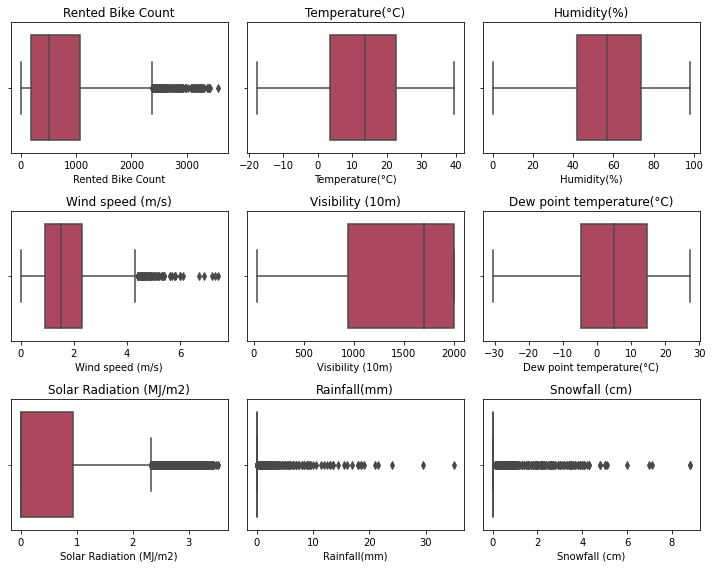

In [ ]:
# Checking Outliers of all Numeric Features with Seaborn Boxplot -
n = 1
plt.figure(figsize=(10,8))
for i in numeric_features.columns:
 plt.subplot(3,3,n)
 n=n+1
 sns.boxplot(df[i], palette = 'inferno')
 plt.title(i)
 plt.tight_layout()


Why this plot was used?

To detect noise in the data that is outliers.

Inference

As we can see Temperature, Humidity, Visibility,Dew point Temperature have no outliers whereas all other column features have outliers. 

Business Implication

We will be able to make better business decisions because we have got rid of the noise in data which could have impacted our choosing of best possible decision.


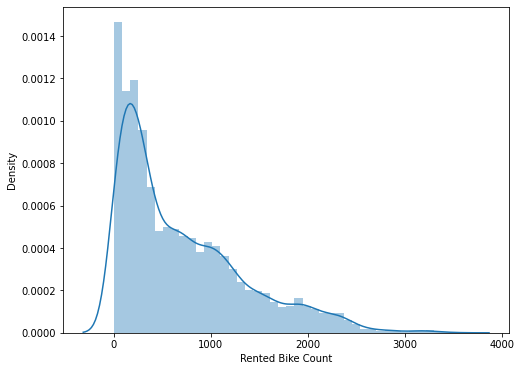

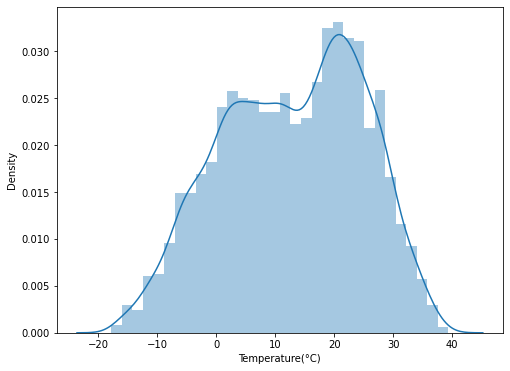

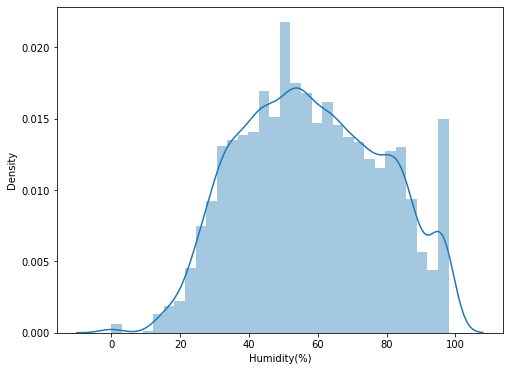

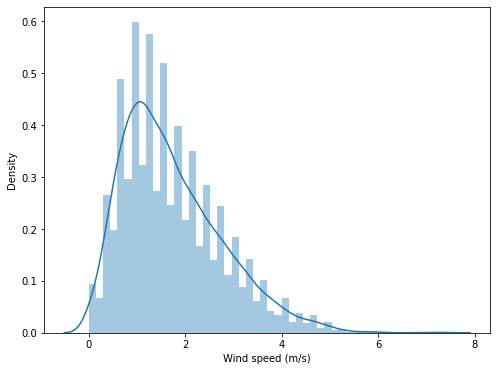

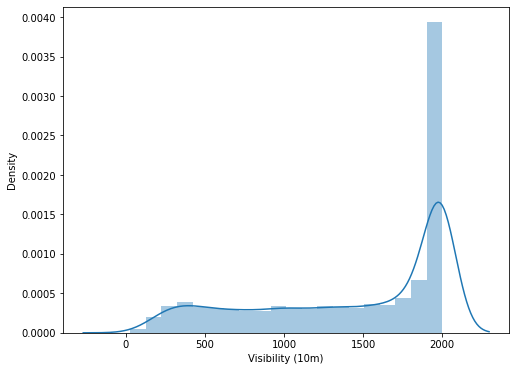

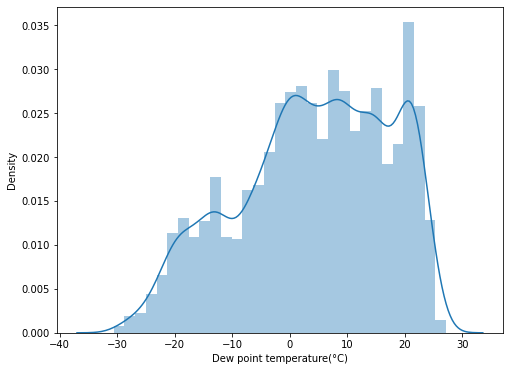

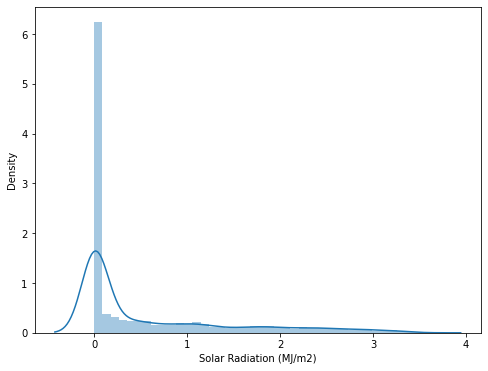

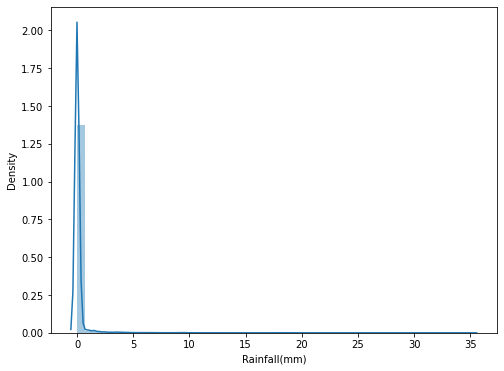

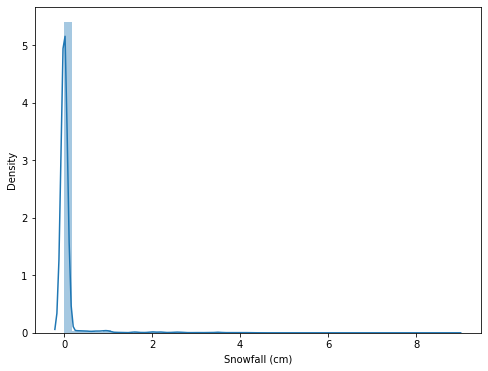

In [ ]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_features:
 plt.figure(figsize=(8,6))
 sns.distplot(x=df[col])
 plt.xlabel(col)
 plt.show()

Why this plot was chosen?

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.

Inferences:
1. Most of the Data points for **Rented bike count- The Target Feature** lie between 0 and 1000 with the density of magnitude of values following a decreasing trend from 0 to 3000. Its a right skewed distribution.
2. Data points for Temperature follow a right skewed distribution.
3. Maximum data points in Humidity follow a normal distribution trend.
4. Data points in wind speed follow a left skewed distribution.
5. Density of Data points in visibility follow an steady value trend up till 15000 m and then increases from 15000 m to 19000 m and it then rises sharply to 20000 m.
6. Data points in Dew point temperature follow a near anout left skewed distribution.
7. Density of Data points in Solar radiation decreases sharply from start and then remains steady.
8. Data points in Rainfall and Snowfall follow a right skewed normal distribution pattern.

Business Implication

Knowing the distribution of data can help us make right selection of variables to be altered through various marketing tactics. This plot when used in combination with bar plots and point plots can give us accurate information about what variables affect the growth in what way.

##Target Feature Conditioning- Normalizing the dependent/target variable.

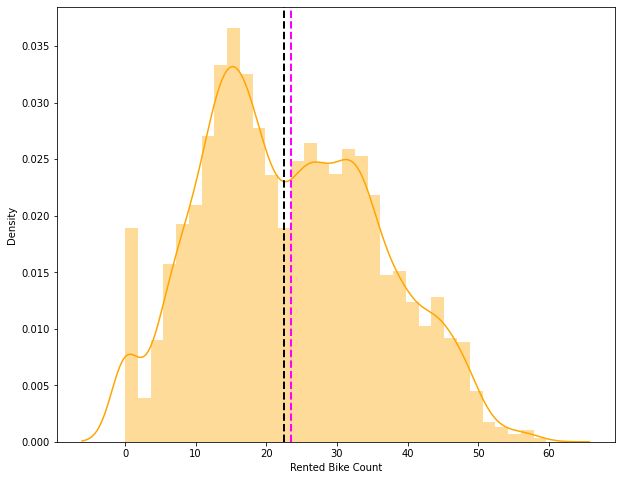

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(df['Rented Bike Count']), color="orange")
ax.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Why this plot was chosen?

This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.

Inference

Now, since mean and median are close to each other the skewness has improved and dataset has a symmetrical distribution. Thus, it should be free from outliers.

Business Implication

Since its the target variable knowing its distribution can help us understand the pattern of Rented bike count usage which can be used as an input to create marketing tactics.

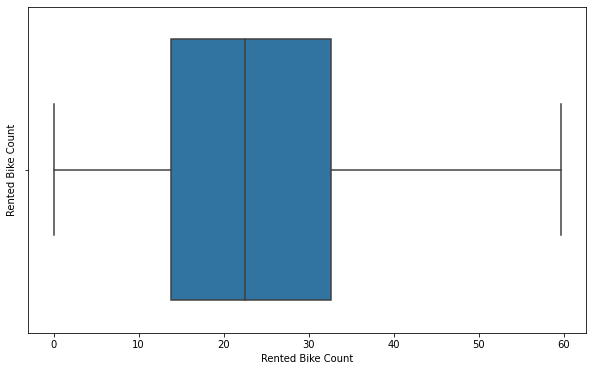

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()


Why this plot was used?

To detect noise in the data that is outliers.

Inference

We do not have any outliers in the target feature column now.

Business Implication

We will be able to make better business decisions because we have got rid of the noise in data which could have impacted our choosing of best possible decision.

## Correlation

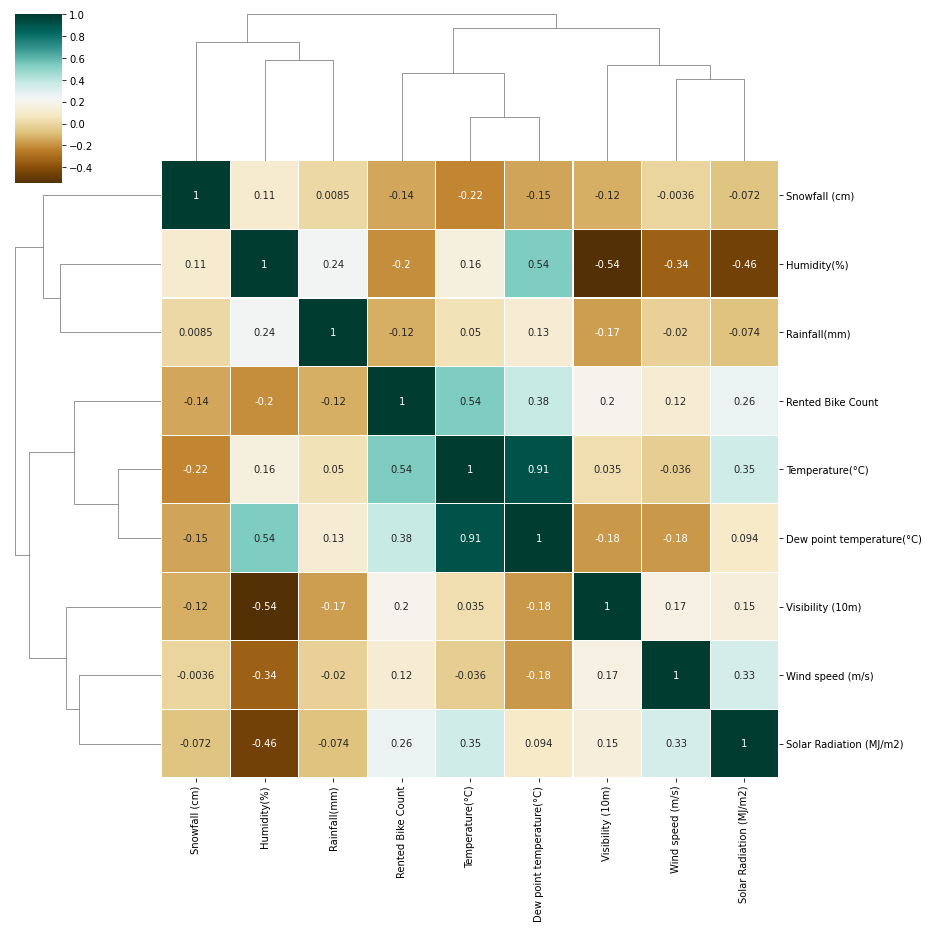

In [ ]:
#creating clustermap for better understanding of Multicollinearity among features
cluster = df.corr()
sns.clustermap(cluster, cmap='BrBG',linewidths=0.1,figsize=(13,13),annot=True,linecolor='white');

Why this plot was used?
clustermap() method uses a hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data. This provides even greater insight than the heatmap.

Inference

We can see from the clustermap above that on the target variable line the most positively correlated variables to the rent are :temperature, dew point temperature, solar radiation and most negatively correlated variables are: Humidity and Rainfall
We also see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91.

From the hierarchical clustering we can see that Snowfall, Humidity and Rainfall belong to same cluster whereas all the other numerical features lie in the other cluster.

Business Impact

This gives us the features which can be grouped together or removed to make the model rightly interpretable. A rightly interpreted model can be used to make business decisions.

## Multicollinearity Handling

In [ ]:
#Importing variance inflation factor and seeing the extent of multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
# Calculating VIF
 vif = pd.DataFrame()
 vif["variables"] = X.columns
 vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 return(vif)

In [ ]:
#Calculating the VIF values for different features
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,Rented Bike Count,3.617343
1,Temperature(°C),34.564747
2,Humidity(%),5.092372
3,Wind speed (m/s),4.566498
4,Visibility (10m),9.055760
5,Dew point temperature(°C),16.039388
6,Solar Radiation (MJ/m2),2.886574
7,Rainfall(mm),1.096052
8,Snowfall (cm),1.119773


After checking for multi collinearity we find that VIF values for 4 features: Temperature, Humidity, Visibility and Dew point temperature is greater than 5 thus contributing to multi-collinearity problem. So, now we remove/drop the Dew point temperature column which is highly correlated to other variables

In [ ]:
#Dropping the Dew point temperature column
df=df.drop(['Dew point temperature(°C)'],axis=1)

In [ ]:
# Again we check for VIF values
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,Rented Bike Count,3.428485
1,Temperature(°C),4.415463
2,Humidity(%),4.833669
3,Wind speed (m/s),4.214112
4,Visibility (10m),4.714768
5,Solar Radiation (MJ/m2),2.251838
6,Rainfall(mm),1.095993
7,Snowfall (cm),1.119709


Now, after dropping Dew point temperature column we see that all the VIF values are below 5 indicating acceptably reduced multi-collinearity.

In [ ]:
#Updating numeric_features
numeric_features= df.select_dtypes(include=['int64','float64'])

## Regression Plots

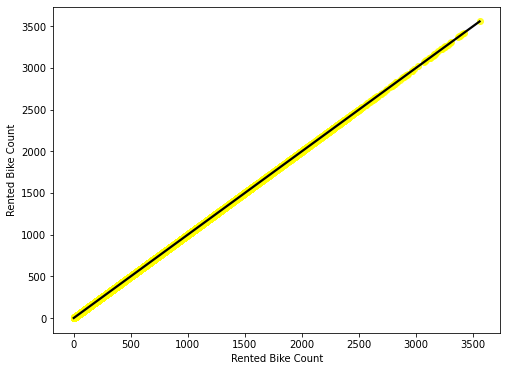

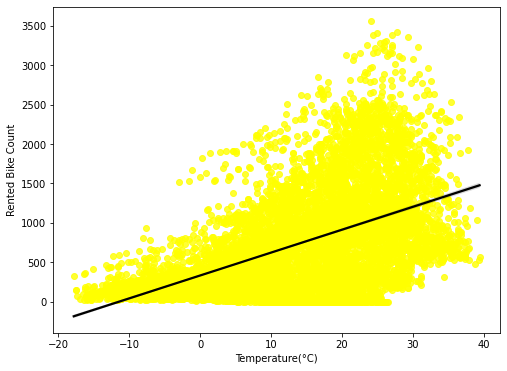

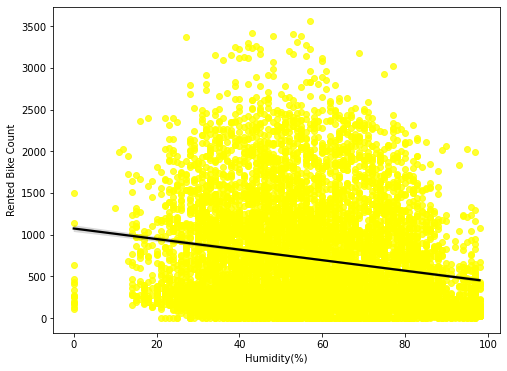

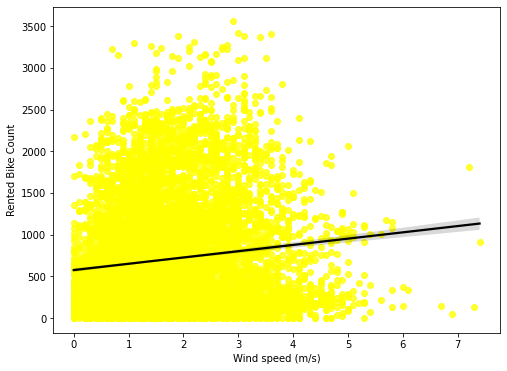

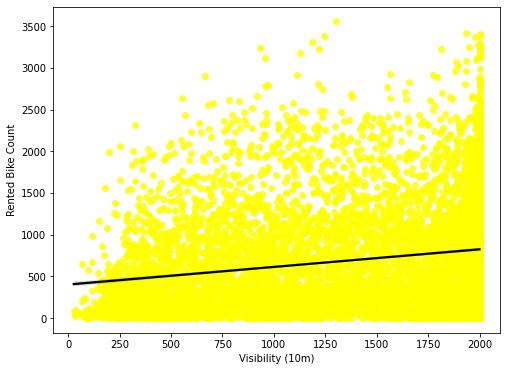

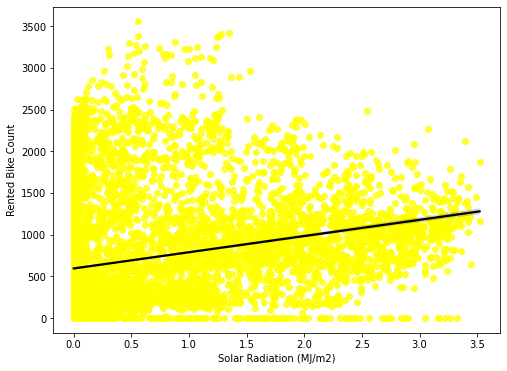

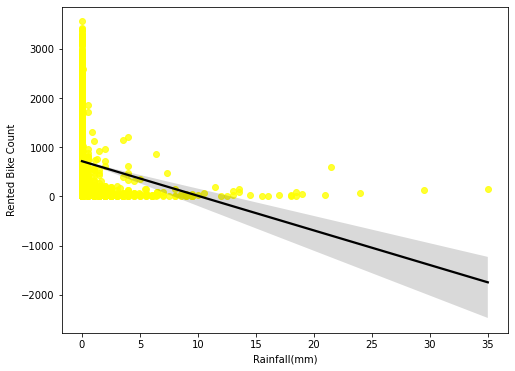

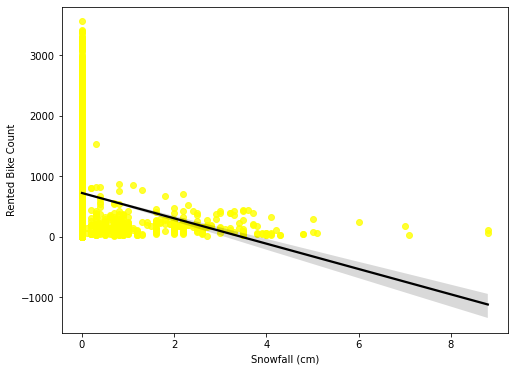

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
 fig,ax=plt.subplots(figsize=(8,6))
 sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'yellow'}, line_kws={"color": "black"})

Why this plot was used?

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. 
Each of the plot provides significant information or rather an interesting story about the data.

Inference

We can see from above Regression plots that variables Temperature, Wind Speed, Visibility and Solar radiation are positively linearly related to the Target variable Rented Bike count whreas Snoowfall, Rainfall and Humdity are negatively linearly related.

Business Implication

We can know from regression plots interplay between two variables and in each of the plots above one of the variables is our Target feature. So, loosely. we can understand how changes in other variables affect our target feature. This information when combined with other analysis can be used to understand the business and come up with a marketing tactic.

##ENCODING - Creating Dummy Variables for Categorical and Object Data Types.

In [ ]:
#creating a copy of df for encoding.
df_copy = df
def one_hot_encoding(data, column):
 data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
 data = data.drop([column], axis=1)
 return data
for col in categorical_features:
  df_copy = one_hot_encoding(df_copy, col)
df_copy.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekend_or_not_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **One hot encoding and feature creation** has been done and we now have **created features** ,thus, more feature columns.

# Train-Test Split

In [ ]:
#Assign the value in X and Y
X = df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df_copy['Rented Bike Count'])

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


## Models

LINEAR REGRESSION

In [ ]:
#import the packages and fitting the model
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)


In [ ]:
#check the score
reg.score(X_train, y_train)

0.7557884266778845

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#importing the packages for evaluation of model
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)
#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)
#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)
#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512172
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
'MAE':round((MAE_lr),3),
'MSE':round((MSE_lr),3),
'RMSE':round((RMSE_lr),3),
'R2_score':round((r2_lr),3),
'Adjusted R2':round((Adjusted_R2_lr ),2)
}
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)
#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)
#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)
#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 36.64474647323363
RMSE : 6.053490437196843
MAE : 4.658361507344821
R2 : 0.7680218977120631
Adjusted R2 : 0.762931808632916


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
'MAE':round((MAE_lr),3),
'MSE':round((MSE_lr),3),
'RMSE':round((RMSE_lr),3),
'R2_score':round((r2_lr),3),
'Adjusted R2':round((Adjusted_R2_lr ),2)
}
test_df=pd.DataFrame(dict2,index=[1])

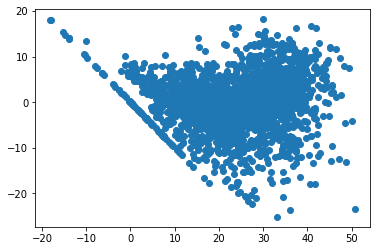

In [ ]:
##Checking the Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

The points are pretty symmetrically distributed, tending to cluster towards the right part of the plot.
All are clustered around a central line.

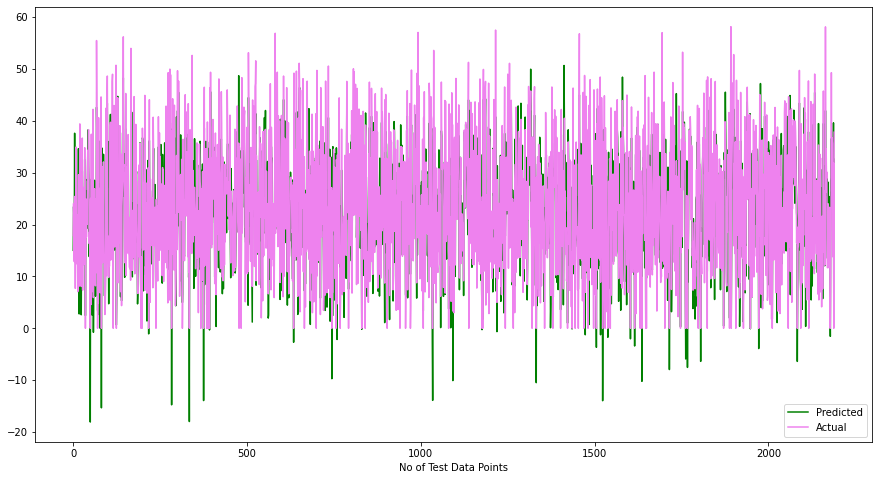

In [ ]:
#plot the compassion plot
plt.figure(figsize=(15,8))
plt.plot((y_pred_test),color='green')
plt.plot(np.array((y_test)),color='violet')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data Points')
plt.show()

The predicted value seems to superimpose the actual value, thus, the model is good.

**Inference and Business impact**-
R-squared value is 0.75 for training set and 0.76 for test set. Mean average error is 4.65 for both.
As per the magnitude of value of R-square it means that independent variables that is categorical and numeric features explain reasonably good enough variation of the target variable in this regression model. This means that this analysis can help businesses understand the data points they have and use them – specifically the relationships between data points – to make better decisions, including anything from predicting sales to understanding inventory levels and supply and demand.


LASSO REGRESSION

In [ ]:
# Creating an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train) # Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

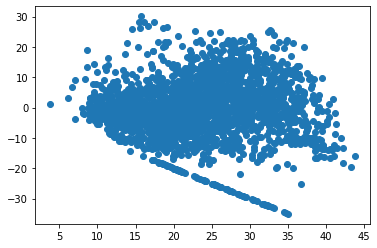

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

The points are pretty symmetrically distributed, tending to cluster towards the middle of the plot. All are clustered around a central line.

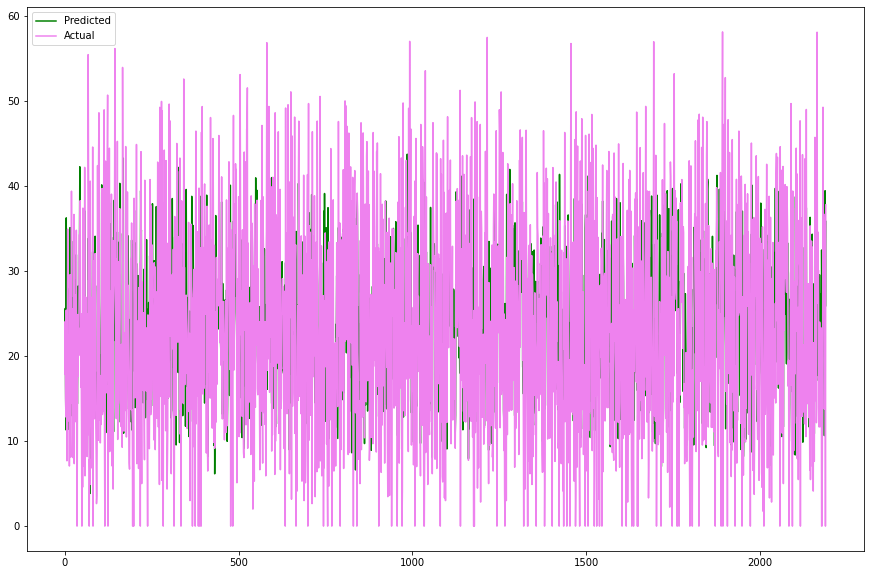

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso),color='green')
plt.plot(np.array((y_test)),color='violet')
plt.legend(["Predicted","Actual"])
plt.show()

The predicted value seems to superimpose the actual value, thus, the model is good.

**Inference and Business impact**-
R-squared value is 0.40 for training set and 0.38 for test set. Mean average error is 7.25 for training set and 7.45 for test set. 
Judging by the residual plot and as per the magnitude of value of R-square it means that independent variables that is categorical and numeric features explain reasonably good enough variation of the target variable in this regression model. This means that this analysis can help businesses understand the data points they have and use them – specifically the relationships between data points – to make better decisions, including anything from predicting sales to understanding inventory levels and supply and demand. 
Improvement- There is no improvement over the earlier model. In fact, earlier model was better.

RIDGE REGRESSION

In [ ]:
#import the packages
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7557883433655243

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368
R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

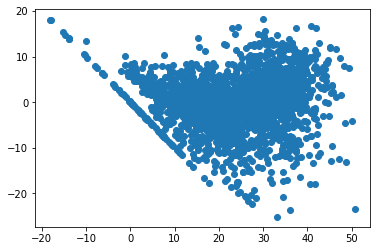

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

The points are pretty symmetrically distributed, tending to cluster towards the right side of the plot. All are clustered around a central line.

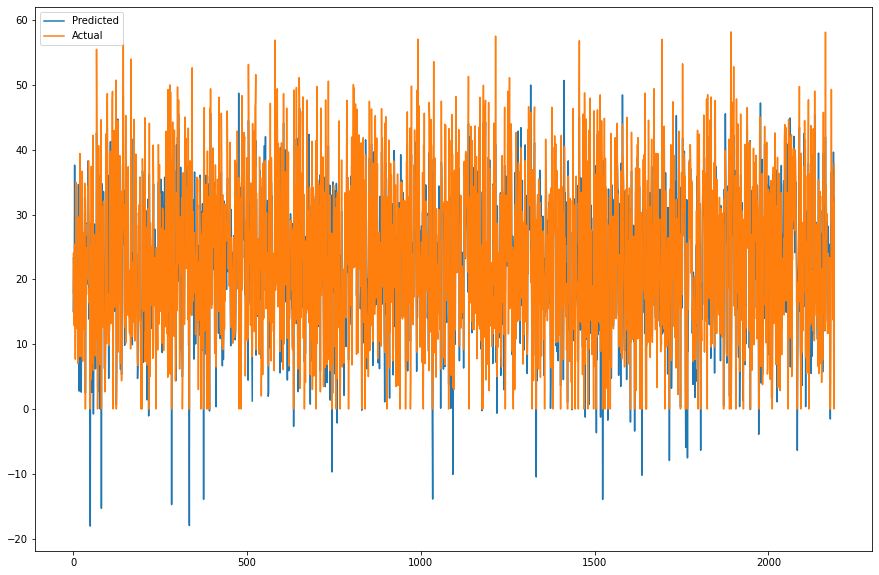

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

The predicted value seems to superimpose the actual value, thus, the model is good.

**Inference and Business impact**-
R-squared value is 0.75 for training set and 0.76 for test set. Mean average error is 4.65 for both.
As per the magnitude of value of R-square it means that independent variables that is categorical and numeric features explain reasonably good enough variation of the target variable in this regression model. This means that this analysis can help businesses understand the data points they have and use them – specifically the relationships between data points – to make better decisions, including anything from predicting sales to understanding inventory levels and supply and demand.
Improvement- There is no significant improvement over the previous two models.

RANDOM FOREST

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9866021175817001
MSE : 2.0631490080606336
RMSE : 1.4363665994656913
MAE : 0.948607586079386
R2 : 0.9866021175817001
Adjusted R2 : 0.9863081397695339


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 15.863909952463956
RMSE : 3.982952416545289
MAE : 2.571934050251861
R2 : 0.8995741523733194
Adjusted R2 : 0.8973705973600355


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

**Inference and Business impact**-
1. R-squared value is 0.98 for training set and 0.89 for test set. Mean average error is 0.94 for training set and 2.57 for test set.
2. As per the magnitude of value of R-square it means that independent variables that is categorical and numeric features explain variation of the target variable really well in this regression model. 
3. This means that this analysis can help businesses understand the data points they have and use them – specifically the relationships between data points – to make better decisions, including anything from predicting sales to understanding inventory levels and supply and demand.
4. Improvement- There is a significant improvement over the previous three models and it is the best model up till now.

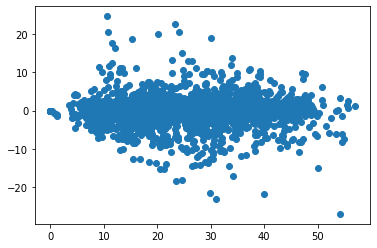

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

The points are pretty symmetrically distributed, tending to cluster towards the middle of the plot.All the points seem to be clustered about a central line.

## Feature Importance

In [ ]:
#Checking the feature importance for this randiom forest regressor model
rf_model.feature_importances_

array([3.18915139e-01, 1.61589124e-01, 1.37270655e-02, 1.43257378e-02,
       3.35028525e-02, 3.23242518e-02, 1.14601955e-03, 4.27679855e-03,
       1.29626550e-02, 1.99367722e-02, 2.73638305e-02, 2.41058678e-02,
       7.88735821e-03, 3.87660021e-03, 1.34236141e-02, 8.95239710e-04,
       2.34978202e-03, 1.04960031e-03, 2.07686311e-04, 2.23243622e-04,
       3.26613957e-04, 1.39750636e-03, 3.64656062e-03, 1.06325601e-02,
       3.15925503e-02, 1.78146248e-02, 1.23095186e-02, 1.32686446e-02,
       1.02910791e-02, 3.94725749e-03, 5.65856793e-03, 1.34811837e-03,
       1.02959324e-02, 3.02670679e-03, 1.50937474e-01, 1.02115746e-03,
       3.07328787e-03, 1.52693588e-03, 1.64576055e-03, 1.55622698e-03,
       1.18612358e-03, 1.87015588e-03, 1.75682584e-03, 1.77749140e-03,
       3.60426635e-03, 6.78143889e-04, 9.72067054e-03])

In [ ]:
#Converting feature  and their feature names into a dictionary and then into a dataframe
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)

In [ ]:
#Rounding off feature importance values to 2 decimal places
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
#Sorting feature importance indescending order of their values
Sorted_importance_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
Sorted_importance_df

,Feature,Feature Importance
0,Temperature(°C),0.32
1,Humidity(%),0.16
34,Functioning Day_Yes,0.15
4,Solar Radiation (MJ/m2),0.03
5,Rainfall(mm),0.03
10,Hour_4,0.03
24,Hour_18,0.03
9,Hour_3,0.02
11,Hour_5,0.02
25,Hour_19,0.02


**Here, we can see that Temperature(°C)	, Humidity(%)	, Functioning Day_Yes are the most important features with values 0.32, 0.16 and 0.15. This means that these three can be used to explain the variation in the target variable. Thus we can take measures in business to improve our revenue and profits if we advertise our renting services and make more rented bikes available as per the variation observed in these three top features.**

In [ ]:
#Making dataframes for plotting
Feature_name=Sorted_importance_df['Feature']
Feature_importance=Sorted_importance_df['Feature Importance']

<BarContainer object of 47 artists>

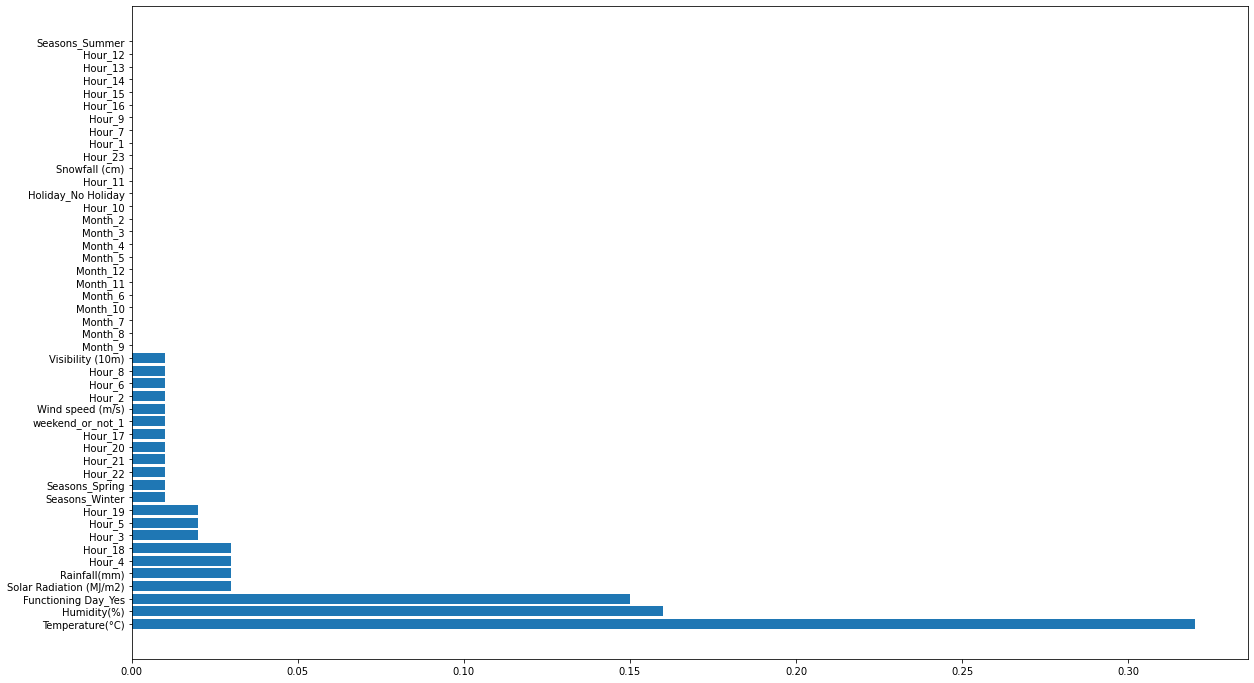

In [ ]:
#Plot the figure
#Figure Size
fig,ax=plt.subplots(figsize =(20, 12))
#Horizontal Bar Plot
ax.barh(Feature_name,Feature_importance)

# CONCLUSION

During the time of our analysis, we initially did EDA on all the features of our datset. We also analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 4 machine learning algorithms Linear Regression,lasso,ridge,and Random Forest. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0         Linear regression   4.658  37.606  6.132     0.756   
             1          Lasso regression   7.255  91.594  9.570     0.405   
             2          Ridge regression   4.658  37.606  6.132     0.756   
             3  Random forest regression   0.949   2.063  1.436     0.987   
Test set     0         Linear regression   4.658  36.645  6.053     0.768   
             1          Lasso regression   7.456  96.775  9.837     0.387   
             2          Ridge regression   4.659  36.647  6.054     0.768   
             3  Random forest regression   2.572  15.864  3.983     0.900   

                Adjusted R2  
Training set 0         0.75  
             1         0.39  
             2         0.75  
             3         0.99  
Test set     0         0.76  
             1         0.37  
             2         0.76  
             3         0.90


• No overfitting is seen.

• Random forest Regressor gives the highest R2 score of 98% for Train Set and 90% for Test set.

• We can deploy this model.



However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.